In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Problem 3

$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x}  = \alpha \frac{\partial^2u}{\partial x^2}+\beta\frac{\partial ^3 u}{\partial x^3}

$$v_j^{n+1} = \frac{1}{2}(v_{j+1}^n+v_{j-1}^n) - \frac{a\lambda}{1+ (a\lambda)^2} (v_{j+1}^n - v_{j-1}^n) + \Delta t f_j^n$$

a) Convection: 
$$\frac{\partial u}{\partial t} + 0.1 \frac{\partial u}{\partial x} = 0$$

Lax-Wendroff scheme: 
$$u_{i}^{n+1}=u_{i}^{n}-{\frac {\Delta t}{2\Delta x}}c\left[u_{i+1}^{n}-u_{i-1}^{n}\right]+{\frac {\Delta t^{2}}{2\Delta x^{2}}}c^{2}\left[u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}\right]$$

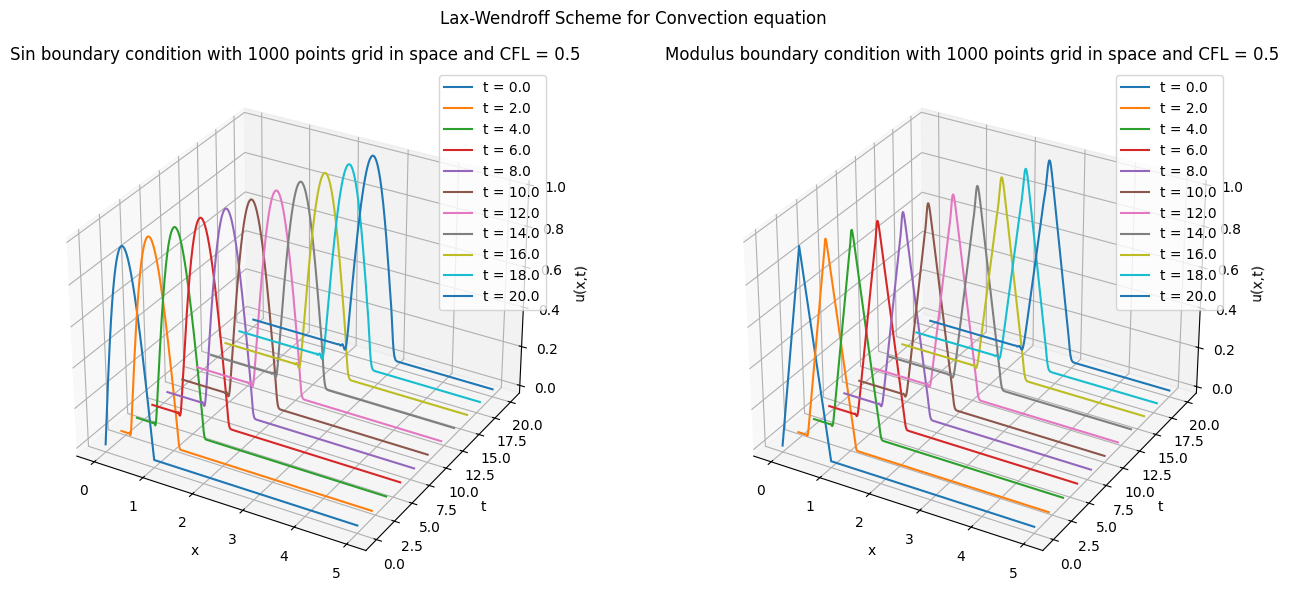

In [28]:
def rhs(x, case):
    if case == 0: 
        if x < 1:
            return np.sin(np.pi * x)
        else: 
            return 0
    else:
        if x < 1:
            return 1 - abs(2 * x - 1)
        else:
            return 0

def Lax_Wendroff(N, c=0.1, case=1):
    # N - number of space points    
    x = np.linspace(0, 5, num=N)
    dx = x[1] - x[0]
    alpha = 0.5
    dt = alpha * dx / c
    t = np.arange(0, 20 + dt, dt)
    Nt = len(t)
    u = np.zeros((N, Nt))
    for i in range(len(x)):
        u[i][0] = rhs(x[i], case)  # boundary condition u(x,0) = rhs
    for j in range(len(t)):
        u[0][j] = 0  # boundary condition: u(0,t) = 0
    for n in range(0, Nt - 1):
        for i in range(1, N - 1):  # we don't care about i = N, since from boundary condition it's zero and we have set u = zero array initially, so it satisfied
            u[i][n + 1] = u[i][n] - 0.5 * alpha * (u[i + 1][n] - u[i - 1][n]) + 0.5 * alpha**2 * (u[i + 1][n] - 2 * u[i][n] + u[i - 1][n])
    return u, x, t

# Solve the equation
N = 1000

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})
fig.suptitle('Lax-Wendroff Scheme for Convection equation')

# Plot for case 0
case = 0
u, x, t = Lax_Wendroff(N=N, case=case)
time_points = np.arange(0, 21, 2)
time_indices = [np.argmin(np.abs(t - tp)) for tp in time_points]
for idx in time_indices:
    ax1.plot(x, t[idx] * np.ones_like(x), u[:, idx], label=f't = {t[idx]:.1f}')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
ax1.set_title(f'Sin boundary condition with {N} points grid in space and CFL = 0.5')
ax1.legend()

# Plot for case 1
case = 1
u, x, t = Lax_Wendroff(N=N, case=case)
time_points = np.arange(0, 21, 2)
time_indices = [np.argmin(np.abs(t - tp)) for tp in time_points]
for idx in time_indices:
    ax2.plot(x, t[idx] * np.ones_like(x), u[:, idx], label=f't = {t[idx]:.1f}')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('u(x,t)')
ax2.set_title(f'Modulus boundary condition with {N} points grid in space and CFL = 0.5')
ax2.legend()

plt.tight_layout()
plt.show()

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} = \alpha \frac{u_{i-1}^n - 2u_i^n + u_{i+1}^n}{\Delta x^2}$$

$$u_i^{n+1} = u_i^n + \alpha \frac{\Delta t}{\Delta x^2}(u_{i-1}^n - 2u_i^n + u_{i+1}^n)$$

In [29]:
def FTCS(N,a=0.1/(np.pi**2),case=0):
    #N - number of space points
    x = np.linspace(0, 1, num=N)
    dx = x[1] - x[0]
    alpha = 0.5
    dt = alpha * dx**2 /(2*a)
    t = np.arange(0, 20 + dt, dt)
    Nt = len(t)
    u = np.zeros((N, Nt))
    for i in range(len(x)):
        u[i][0] = rhs(x[i],case)
    for j in range(len(t)):
        u[0][j] = 0
        u[-1][j] = 0
    for n in range(0,Nt-1):
        for i in range(1,N-1):
            u[i][n+1] = u[i][n] + alpha*(u[i-1][n]-2*u[i][n]+u[i+1][n])
    return u,x,t

In [30]:
# Solve the equation
N = 200
u0, x0, t0 = FTCS(N=N, case=0)
u1, x1, t1 = FTCS(N=N, case=1)

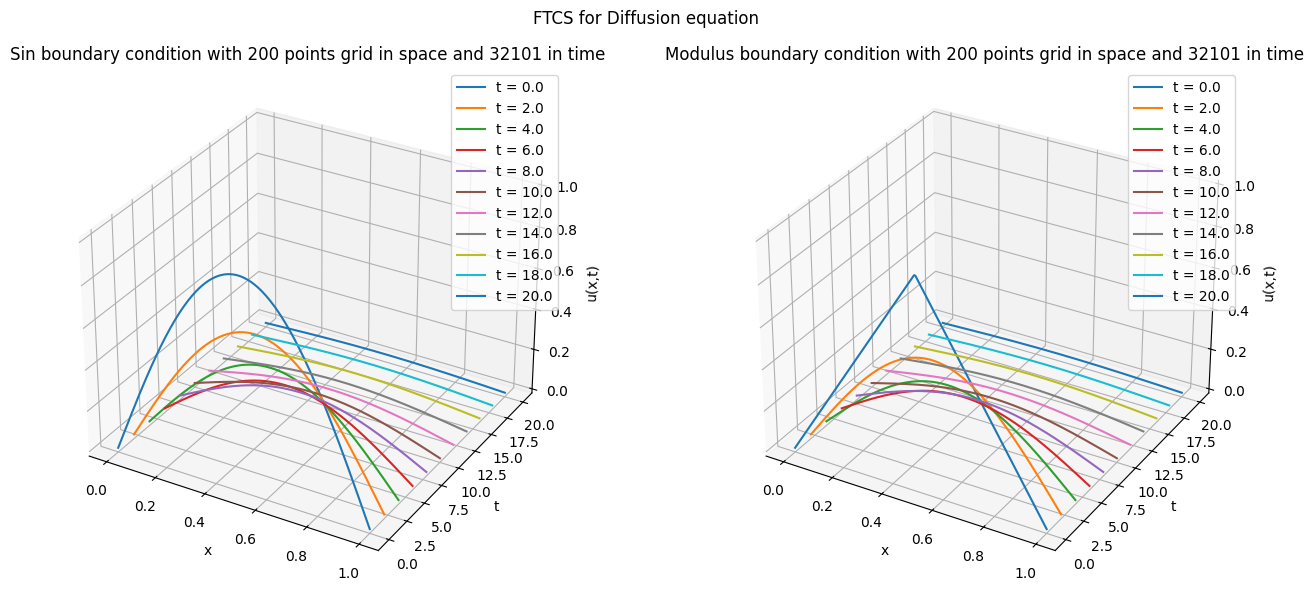

In [31]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})
fig.suptitle('FTCS for Diffusion equation')

# Plot for case 0
case = 0

time_points = np.arange(0, 21, 2)
time_indices = [np.argmin(np.abs(t0 - tp)) for tp in time_points]
for idx in time_indices:
    ax1.plot(x0, t0[idx] * np.ones_like(x0), u0[:, idx], label=f't = {t0[idx]:.1f}')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
ax1.set_title(f'Sin boundary condition with {N} points grid in space and {int(len(t0))} in time')
ax1.legend()

# Plot for case 1
case = 1

time_points = np.arange(0, 21, 2)
time_indices = [np.argmin(np.abs(t1 - tp)) for tp in time_points]
for idx in time_indices:
    ax2.plot(x1, t1[idx] * np.ones_like(x1), u1[:, idx], label=f't = {t1[idx]:.1f}')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('u(x,t)')
ax2.set_title(f'Modulus boundary condition with {N} points grid in space and {int(len(t1))} in time')
ax2.legend()

plt.tight_layout()
plt.show()

## Different approach

$$f_i^{(3)} = \frac{f_{i-1}-3f_i+3f_{i+1} - f_{i+2}}{2h^3} + O(h)$$

$$\frac{u_i^{n+1}- u_i^n}{\Delta t} =\frac{\beta}{2}\left(\frac{u_{i-1}^{n+1} -3u_{i}^{n+1} - 3u_{i+1}^{n+1} -u_{i+2}^{n+1}}{2\Delta x^3} + \frac{u_{i-1}^{n} -3u_{i}^{n} - 3u_{i+1}^{n} -u_{i+2}^{n}}{2\Delta x^3} \right)$$

 \begin{equation*}
 \begin{gathered}
  u_{i-1}^{n+1}(\frac{-\beta}{4\Delta x^3})+ u_i^{n+1}(1 + \frac{3\beta\Delta}{4\Delta x^3}) + u_{i+1}^{n+1}(\frac{3\beta}{4\Delta x^3}) + u_{i+2}^{n+1}\frac{\beta}{4\Delta x^3} = 
  \\ = 
  u_{i-1}^n\frac{\beta}{4\Delta x^3} + u_i^n(1-\frac{3\beta}{4\Delta x^3}) + u_{i+1}
^n\frac{-3\beta}{4\Delta x^3} + u_{i+2}^n\frac{-\beta}{4\Delta x^3}
 \end{gathered}
 \end{equation*}


In [32]:
def CN(N, b = 0.001/(np.pi**2),case = 1):
    x = np.linspace(0, 10, num=N)
    dx = x[1] - x[0]
    coef = 0.01 
    dt = coef*(dx**4)/b
    t = np.arange(0, 20 + dt, dt)
    Nt = len(t)
    u = np.zeros((N, Nt))
    alpha = b*dt/(4*dx**3)
    for i in range(len(x)):
        u[i][0] = rhs(x[i],case)
    A = np.zeros((N, N))
    b = np.zeros(N)
    for n in range(0,Nt-1):
        for i in range(1,N-2):
            A[i][i-1] = -alpha
            A[i][i] = 1+3*alpha
            A[i][i+1] = 3*alpha
            A[i][i+2] = alpha
            b[i] = u[i-1][n]*alpha + u[i][n]*(1-3*alpha) + u[i+1][n]*(-3*alpha) - u[i+2][n]*alpha
        A[0][0] = 1
        A[-2][-2] = 1
        A[-1][-1] = 1
        #print(A)
        sol = np.linalg.solve(A,b)
        #print(np.shape(sol))
        #print(sol)
        u[:,n+1] = sol.flatten()
    return u,x,t


In [33]:
# Solve the equation
N = 100
u0, x0, t0 = CN(N=N, case=0)
u1, x1, t1 = CN(N=N, case=1)

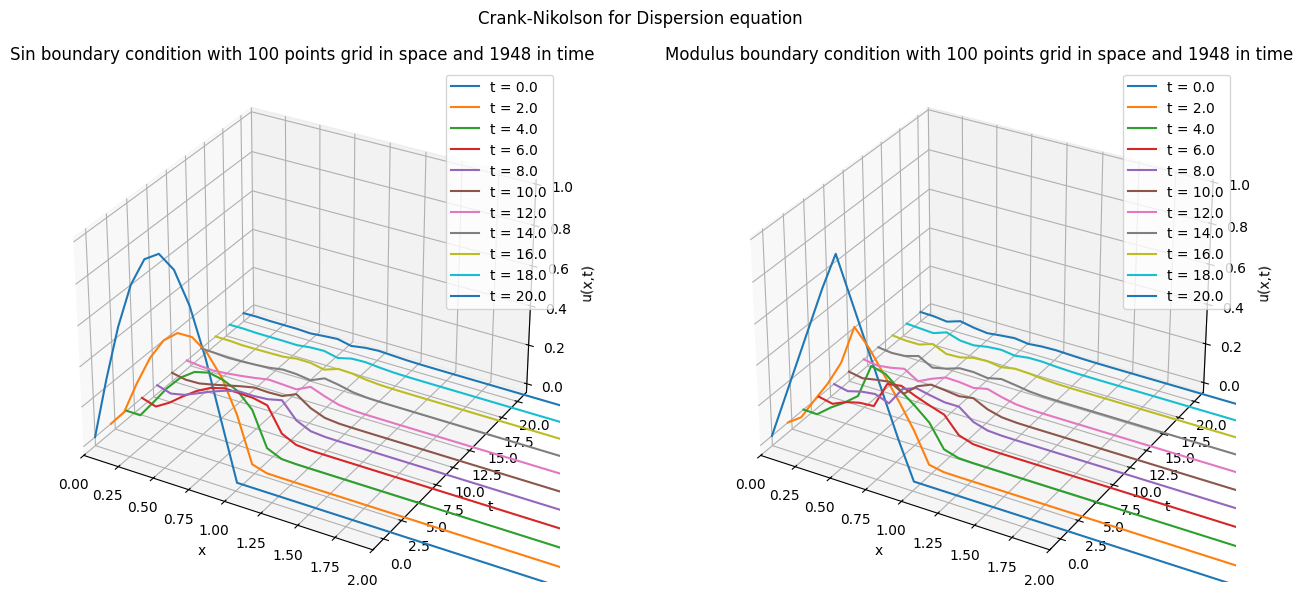

In [34]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})
fig.suptitle('Crank-Nikolson for Dispersion equation')
# Plot for case 0
case = 0

time_points = np.arange(0, 21, 2)
time_indices = [np.argmin(np.abs(t0 - tp)) for tp in time_points]
for idx in time_indices:
    ax1.plot(x0, t0[idx] * np.ones_like(x0), u0[:, idx], label=f't = {t0[idx]:.1f}')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('u(x,t)')
ax1.set_title(f'Sin boundary condition with {N} points grid in space and {int(len(t0))} in time')
ax1.set_xlim((0,2))
ax1.legend()

# Plot for case 1
case = 1

time_points = np.arange(0, 21, 2)
time_indices = [np.argmin(np.abs(t1 - tp)) for tp in time_points]
for idx in time_indices:
    ax2.plot(x1, t1[idx] * np.ones_like(x1), u1[:, idx], label=f't = {t1[idx]:.1f}')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('u(x,t)')
ax2.set_xlim((0,2))
ax2.set_title(f'Modulus boundary condition with {N} points grid in space and {int(len(t1))} in time')
ax2.legend()

plt.tight_layout()
plt.show()

# Problem 4

In [35]:
def twodim(dx=1/25,dy=1/25,l=1,h=1,Fr=1,Re=1,t_max = 10):
    x = np.arange(0,l+dx,dx)
    y = np.arange(0,h+dy,dy)
    Nx = len(x)
    Ny = len(y)
    dx2 = dx*dx
    dy2 = dy*dy
    dt = 0.125*Re/(1/dx2+ 1/dy2)
    time = np.arange(0,t_max+dt,dt )
    
    Nt = len(time)
    #print(time,Nt)
    u = np.zeros((Nx,Ny,Nt))
    for t in range(1,Nt):
        for j in range(1,Ny-1):
            for i in range(1,Nx-1):
                d2udx2 = (u[i+1,j,t-1]-2*u[i,j,t-1] + u[i-1,j,t-1])/dx2
                d2udy2 = (u[i,j+1,t-1]-2*u[i,j,t-1] + u[i,j-1,t-1])/dy2
                u[i,j,t] = u[i,j,t-1] + dt*Fr + dt/Re * (d2udx2 + d2udy2)
            
            #u[i,-1,t] = 0
            #print(u[i,-1,t])

        # setting boundaries: 
        u[:,0,t] = 0
        u[0,:,t] = 0
        u[Nx-1,:,t] = 0
        u[:,Ny-1,t] = (4*u[:,Ny-2,t]-u[:,Ny-3,t])/3
        #u[:,-1,t] 0 
        
    return u,x,y,time



In [36]:
u1,x,y,time1 = twodim(Re = 1)
u2,x,y,time2 = twodim(Re=10)

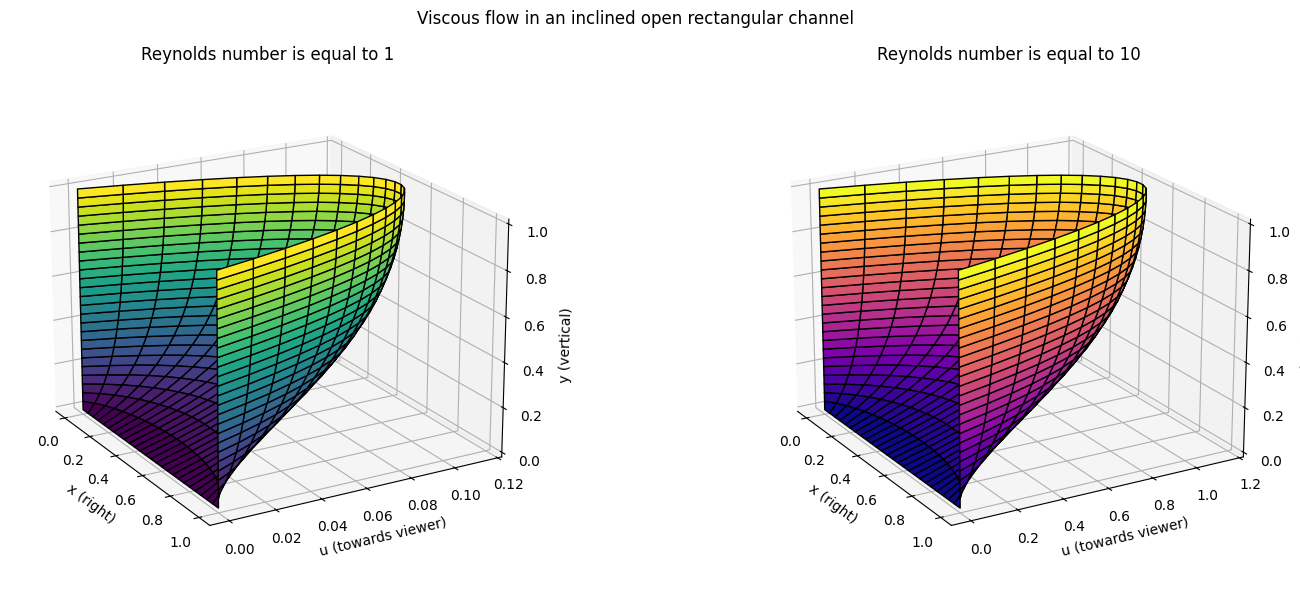

In [37]:
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': '3d'})
fig.suptitle('Viscous flow in an inclined open rectangular channel ')

# Plot the first function u1
ax1 = axes[0]
# Swap axes: X (x) -> x-axis, u1 -> y-axis (pointing towards viewer), Y (y) -> z-axis (vertical)
surf1 = ax1.plot_surface(X, u1[:, :, -1].T, Y, cmap='viridis', edgecolor='k')  # Transpose u1 if needed
ax1.set_xlabel('x (right)')
ax1.set_ylabel('u (towards viewer)')
ax1.set_zlabel('y (vertical)')
ax1.set_title(r'Reynolds number is equal to 1')
ax1.view_init(elev=20, azim=-30)  # Adjust viewing angle

# Plot the second function u2
ax2 = axes[1]
surf2 = ax2.plot_surface(X, u2[:, :, -1].T, Y, cmap='plasma', edgecolor='k')
ax2.set_xlabel('x (right)')
ax2.set_ylabel('u (towards viewer)')
ax2.set_zlabel('y (vertical)')
ax2.set_title(r'Reynolds number is equal to 10')
ax2.view_init(elev=20, azim=-30)

plt.tight_layout()
plt.show()


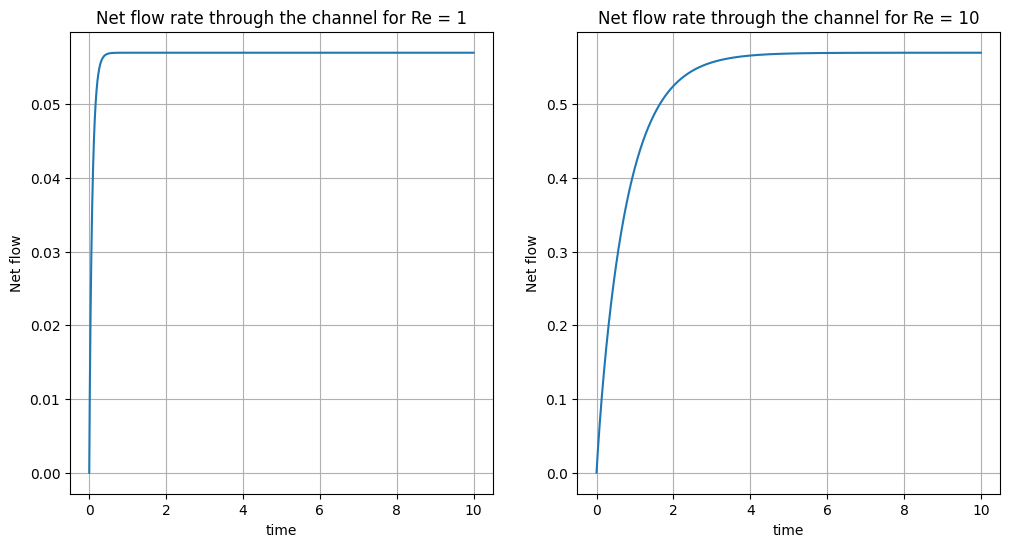

In [38]:
q1 = []
q2 = []
for t in range(len(time1)):
    q1y_t = []
    for j in range(len(y)):
        q1y_t.append(integrate.trapezoid(u1[:,j,t],x))
        #print(q1y_t)
    q1.append(integrate.trapezoid(q1y_t,y))
for t in range(len(time2)):
    q2y_t = []
    for j in range(len(y)):
        q2y_t.append(integrate.trapezoid(u2[:,j,t],x))
    q2.append(integrate.trapezoid(q2y_t,y))
fix,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(time1,q1)
ax[0].set_title('Net flow rate through the channel for Re = 1')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Net flow')
ax[0].grid(True)
ax[1].plot(time2,q2)
ax[1].set_title('Net flow rate through the channel for Re = 10')
ax[1].set_xlabel('time')
ax[1].set_ylabel('Net flow')
ax[1].grid(True)
plt.show()
    

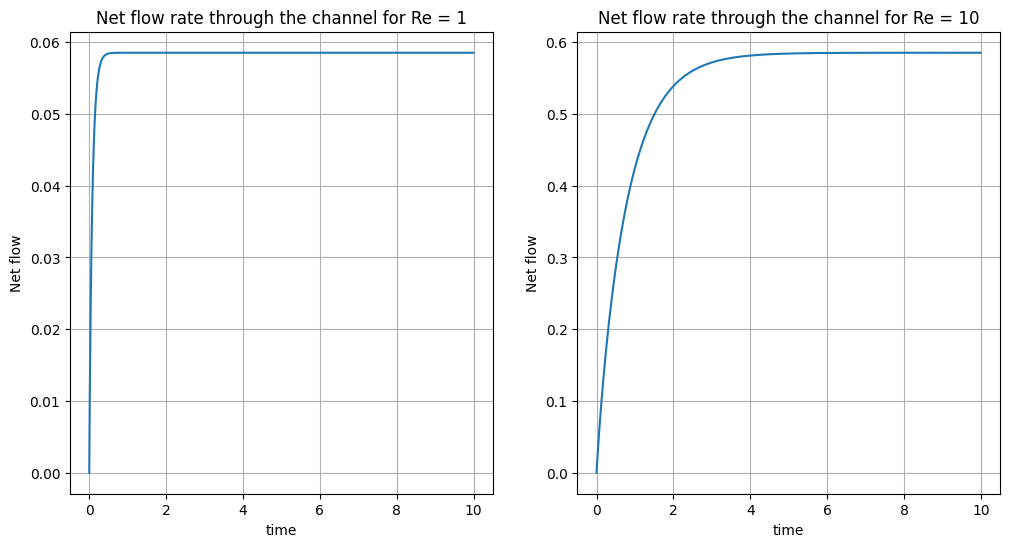

In [39]:
#Calculation of net flow rate through the channel
fix,ax = plt.subplots(1,2,figsize=(12,6))
dx = 1/25
dy = 1/25
q1_ = [dx*dy*np.sum(u1[:,:,i]) for i in range(np.shape(u1)[-1])]
q2_ = [dx*dy*np.sum(u2[:,:,i]) for i in range(np.shape(u2)[-1])]
ax[0].plot(time1,q1_)
ax[0].set_title('Net flow rate through the channel for Re = 1')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Net flow')
ax[0].grid(True)
ax[1].plot(time2,q2_)
ax[1].set_title('Net flow rate through the channel for Re = 10')
ax[1].set_xlabel('time')
ax[1].set_ylabel('Net flow')
ax[1].grid(True)
plt.show()


In [40]:
print(f'For first case: {np.max(np.abs(np.array(q1)-np.array(q1_)))}')
print(f'For second case: {np.max(np.abs(np.array(q2)-np.array(q2_)))}')

For first case: 0.0015219726348160365
For second case: 0.015219652649676396


In [41]:
q1[-1]

0.057003327738837845

In [42]:
q2[-1]

0.5700309322119127

In [43]:
len(time1)

100001

In [44]:
len(time2)

10001

# Problem 5

In [45]:
def Jacoby(dx, dy, l=1, tolerance_temp=10**(-7), tolerance_residual=10**(-5)):
    # Create grid points
    x = np.arange(0, l+dx, dx)
    y = np.arange(0, l+dy, dy)
    Nx, Ny = len(x), len(y)
    
    # Initialize solution
    u = np.zeros((Nx, Ny))
    u_previuos = u.copy() + 1

    factor = 2/(dx**2) + 2/(dy**2)
    residual = np.zeros((Nx,Ny))
    residuals = []
    difference = []
    iter = 0
    while (np.max(abs(u-u_previuos)) >= tolerance_temp) or (np.max(np.abs(residual))>=tolerance_residual): #TODO: Add conditon on residual
        u_previous = u.copy()
        for j in range(1,Ny-1):
            for i in range(1,Nx-1):
                ux = (u_previous[i+1,j] +u_previous[i-1,j])/(dx**2)
                uy = (u_previous[i,j+1] +u_previous[i,j-1])/(dy**2)
                u[i,j] = (ux+uy)/factor
                u[-1,j] = 1/3*(2*dx*(1-y[j]) + 4*u[-2,j]-u[-3,j])
        # --- Update Neumann boundaries using second-order finite differences ---
        u[:, 0] = (4*u[:, 1] - u[:, 2] - 2*dy*x) / 3
        #u[:,0] = 1 #sanity check
        
        u[-1, :] = (4*u[-2, :] - u[-3, :] + 2*dx*(1 - y)) / 3
        #u[-1,:] = 1 #sanity check
        
        # --- Dirichlet boundaries ---
        u[0, :] = 1.0      # at x=0
        u[:, -1] = 1.0     # at y=l
        for i in range(1,Nx-1):
            for j in range(1,Ny-1):
                residual[i,j] = (u[i+1,j]-2*u[i,j]+ u[i-1,j])/(dx**2) + (u[i,j+1]-2*u[i,j]+u[i,j-1])/(dy**2)
        for j in range(1,Ny-1):
            residual[-1,j] = (1-y[j]) - (3*u[-1,j]+u[-3,j] - 4*u[-2,j])/(2*dx)
        for j in range(1,Nx-1):
            residual[i,0] = x[i] - (-3*u[i,0] + 4*u[i,1] - u[i,2])/(2*dy)
            
        residuals.append(np.max(np.abs(residual)))
        difference.append(np.max(np.abs(u-u_previous)))
        iter+=1
        # Convergence check
        if difference[-1] < tolerance_temp and residuals[-1] < tolerance_residual:
            print(f"Jacoby method converged after {iter} iterations.")
            break
            
    return u, residuals, difference


In [46]:
def Gauss_Seidel(dx,dy,l=1, tolerance_temp=10**(-7), tolerance_residual=10**(-5)):
    x = np.arange(0,l+dx,dx)
    y = np.arange(0,l+dy,dy)
    Nx = len(x)
    Ny = len(y)
    u = np.ones((Nx,Ny))
    u_previuos = u+1
    factor = 2/(dx**2) + 2/(dy**2)
    residual = np.zeros((Nx,Ny))
    difference = []
    residuals = []
    iter = 0
    #for _ in range(2000):
    while (np.max(abs(u-u_previuos)) >= tolerance_temp) or (np.max(np.abs(residual))>=tolerance_residual): #TODO: Add conditon on residual
        u_previuos = u.copy()

        for j in range(1,Ny-1):
            for i in range(1,Nx-1):
                u[0,j] = 1
                ux = (u[i+1,j] +u[i-1,j])/(dx**2)
                uy = (u[i,j+1] +u[i,j-1])/(dy**2)
                u[i,j] = (ux+uy)/factor
                u[-1,j] = 1/3*(2*dx*(1-y[j]) + 4*u[-2,j]-u[-3,j])
     # --- Update Neumann boundaries using second-order finite differences ---
        u[:, 0] = (4*u[:, 1] - u[:, 2] - 2*dy*x) / 3
        #u[:,0] = 1
        
        u[-1, :] = (4*u[-2, :] - u[-3, :] + 2*dx*(1 - y)) / 3
        #u[-1,:] = 1
        
        # --- Dirichlet boundaries ---
        u[0, :] = 1.0      #  at x=0
        u[:, -1] = 1.0     #  at y=l

        for i in range(1,Nx-1):
            for j in range(1,Ny-1):
                residual[i,j] = (u[i+1,j]-2*u[i,j]+ u[i-1,j])/(dx**2) + (u[i,j+1]-2*u[i,j]+u[i,j-1])/(dy**2)
        for j in range(1,Ny-1):
            residual[-1,j] = (1-y[j]) - (3*u[-1,j]+u[-3,j] - 4*u[-2,j])/(2*dx)
        for j in range(1,Nx-1):
            residual[i,0] = x[i] - (-3*u[i,0] + 4*u[i,1] - u[i,2])/(2*dy)
            
        
        residuals.append(np.max(np.abs(residual)))
        difference.append(np.max(np.abs(u-u_previuos)))
        iter+=1
        # Convergence check
        if difference[-1] < tolerance_temp and residuals[-1] < tolerance_residual:
            print(f"Gauss-Seidel method converged after {iter} iterations.")
            break
    return u,residuals,difference

In [47]:
dx = 1/20
dy = 1/20
u_jac,residuals_1,diff_1 = Jacoby(dx,dy)
u_gauss_seidel,residuals_2,diff_2 = Gauss_Seidel(dx,dy)

Jacoby method converged after 4401 iterations.
Gauss-Seidel method converged after 1520 iterations.


In [48]:
dx = 1/20
dy = 1/20
u_jac,residuals_1,diff_1 = Jacoby(dx,dy)
u_gauss_seidel,residuals_2,diff_2 = Gauss_Seidel(dx,dy)

Jacoby method converged after 4401 iterations.
Gauss-Seidel method converged after 1520 iterations.


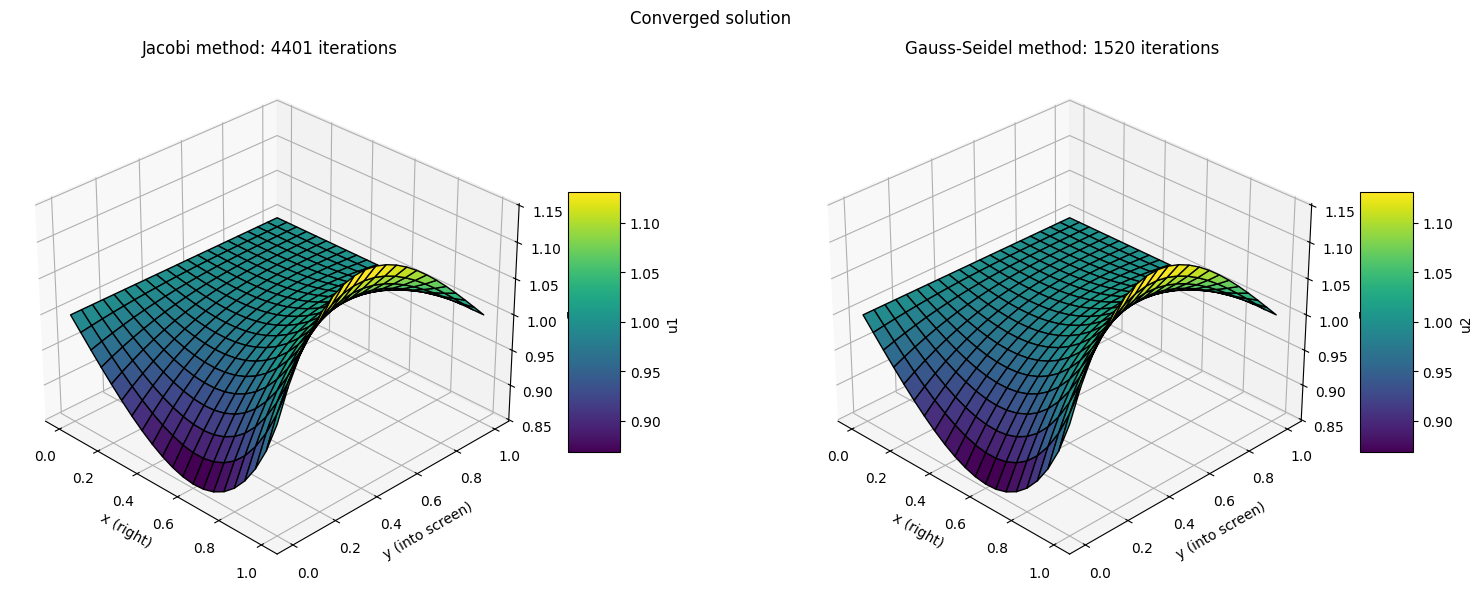

In [49]:
x = np.arange(0, 1 + dx, dx)
y = np.arange(0, 1 + dy, dy)
X, Y = np.meshgrid(x, y)  # X shape = (Ny, Nx), Y shape = (Ny, Nx)

fig, axes = plt.subplots(1,2, figsize=(16, 6), subplot_kw={'projection': '3d'})
fig.suptitle('Converged solution')

# Plot Jacobi method
ax1 = axes[0]
surf1 = ax1.plot_surface(X, Y, u_jac.T, cmap='viridis', edgecolor='k')  # Transpose data
ax1.set_xlabel('x (right)')  # x-axis is now correct
ax1.set_ylabel('y (into screen)')  # y-axis is depth
ax1.set_zlabel('u1')
ax1.set_title(r'Jacobi method: 4401 iterations')
ax1.view_init(elev=30, azim=-45)  # Adjust viewing angle to see (0,0) at left bottom

# Plot Gauss-Seidel method
ax2 = axes[1]
surf2 = ax2.plot_surface(X, Y, u_gauss_seidel.T, cmap='viridis', edgecolor='k')  # Transpose data
ax2.set_xlabel('x (right)')
ax2.set_ylabel('y (into screen)')
ax2.set_zlabel('u2')
ax2.set_title(r'Gauss-Seidel method: 1520 iterations')
ax2.view_init(elev=30, azim=-45)  # Same viewing angle

# Add color bars
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5, label='u1')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5, label='u2')

plt.tight_layout()
plt.show()

In [50]:
print(f'Значение в точке (0,1) (соответствующее $u_{0,-1}$: {u_jac[-1,0]} для метода Jacobi')
print(f'Значение в точке (0,1) (соответствующее $u_{0,-1}$: {u_gauss_seidel[-1,0]} для метода Gauss-Seidel')

Значение в точке (0,1) (соответствующее $u_(0, -1)$: 1.0011090747886857 для метода Jacobi
Значение в точке (0,1) (соответствующее $u_(0, -1)$: 1.001109762233275 для метода Gauss-Seidel


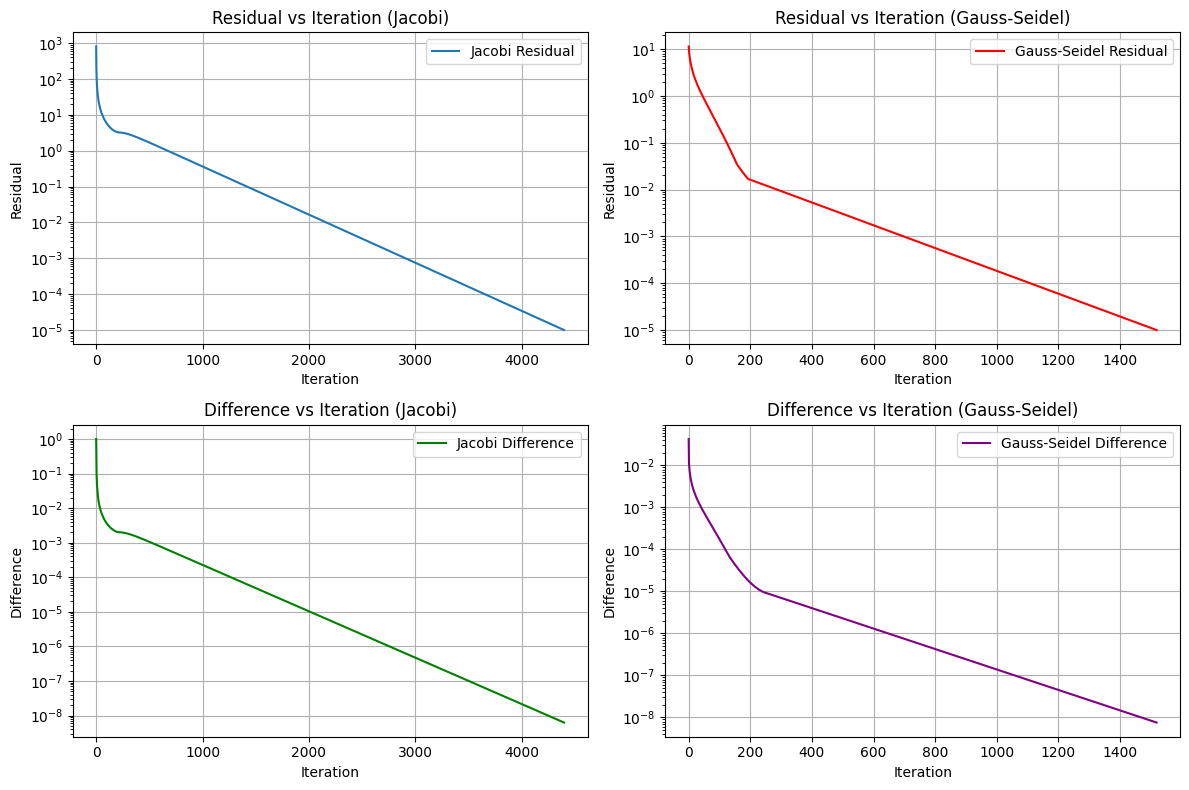

In [51]:
iterations_1 = range(len(residuals_1))
iterations_2 = range(len(residuals_2))

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot residual vs iteration for Jacobi
axes[0, 0].plot(iterations_1, residuals_1, linestyle='-', label='Jacobi Residual')
axes[0, 0].set_title('Residual vs Iteration (Jacobi)')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Residual')
axes[0, 0].set_yscale('log')
axes[0, 0].legend()
axes[0, 0].grid()

# Plot residual vs iteration for Gauss-Seidel
axes[0, 1].plot(iterations_2, residuals_2, linestyle='-', label='Gauss-Seidel Residual', color='r')
axes[0, 1].set_title('Residual vs Iteration (Gauss-Seidel)')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].set_yscale('log')
axes[0, 1].legend()
axes[0, 1].grid()

# Plot difference vs iteration for Jacobi
axes[1, 0].plot(iterations_1, diff_1, linestyle='-', label='Jacobi Difference', color='g')
axes[1, 0].set_title('Difference vs Iteration (Jacobi)')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('Difference')
axes[1, 0].set_yscale('log')
axes[1, 0].legend()
axes[1, 0].grid()

# Plot difference vs iteration for Gauss-Seidel
axes[1, 1].plot(iterations_2, diff_2, linestyle='-', label='Gauss-Seidel Difference', color='purple')
axes[1, 1].set_title('Difference vs Iteration (Gauss-Seidel)')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Difference')
axes[1, 1].set_yscale('log')
axes[1, 1].legend()
axes[1, 1].grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()